In [2]:
import random
import math
import statistics as st
import matplotlib.pyplot as plt

In [3]:
#heads is 1
#tails is 0

def coin_flipper():
    return random.randint(0, 1)

def flipper_count(n=(2**16)):
    heads = 0
    tails = 0
    for _ in range(n):
        if coin_flipper() == 1:
            heads += 1
        else:
            tails += 1
    return (heads, tails)
    
def flipper_intervals():
    return [flipper_count(2**x) for x in [0, 1, 2, 4, 8, 16]]
    


In [4]:
%matplotlib inline

In [49]:
y = flipper_intervals()

In [50]:
print(y)

[(0, 1), (1, 1), (3, 1), (7, 9), (131, 125), (32648, 32888)]


In [5]:
def heads_tails_diff(flips):
    return [h - t for h, t in flips]

def heads_tails_ratio(flips):
    return [h/t for h, t in flips]

In [38]:
diffs = heads_tails_diff(y)
ratio = heads_tails_ratio(y)

In [53]:
print(diffs)
print(ratio)

[-1, 0, 2, -2, 6, -240]
[0.0, 1.0, 3.0, 0.7777777777777778, 1.048, 0.9927025054731209]


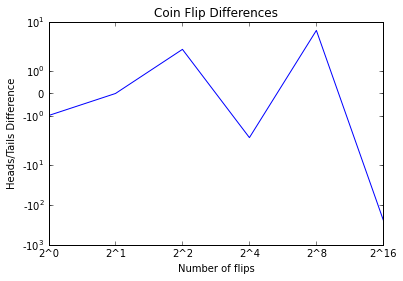

In [39]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
plt.plot(diffs)
plt.yscale("symlog")
plt.xticks([0, 1, 2, 3, 4, 5], x1)
plt.ylabel("Heads/Tails Difference")
plt.xlabel("Number of flips")
plt.title("Coin Flip Differences")

In the early stages, the difference in number of heads and number of tails is very small, as we would expect. As the number of flips increases, the difference will grow, though it is still relatively small compared to the total number of flips.

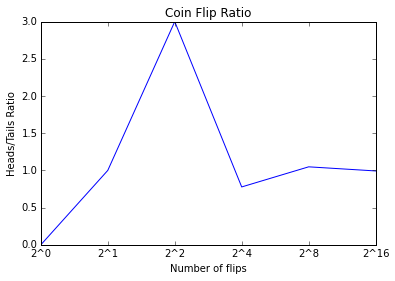

In [55]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
plt.plot(ratio)
plt.xticks([0, 1, 2, 3, 4, 5], x1)
plt.ylabel("Heads/Tails Ratio")
plt.xlabel("Number of flips")
plt.title("Coin Flip Ratio")

The ratio graph shows exactly what we would expect, which is actually the opposite of the difference graph. Early on, the ratio of heads to tails is large (for example, 3 to 1 after four flips). But as the number of flips grows, the ratio approaches 1 to 1. Comparing this graph with the above graph, we see that with lower numbers of flips, the ratio is bigger but the difference is smaller. As the number of flips increases exponentially, the ratio gets smaller (approaching 1), while the difference gets larger.

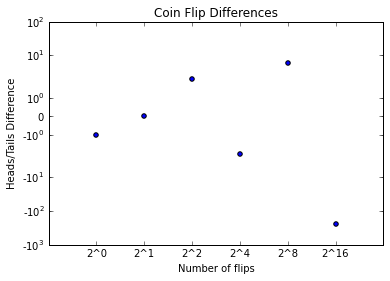

In [35]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
diff = [-1, 0, 2, -2, 6, -240]
plt.scatter(range(6), diff)
plt.yscale("symlog")
plt.xticks(range(6), x1)
plt.ylabel("Heads/Tails Difference")
plt.xlabel("Number of flips")
plt.title("Coin Flip Differences")
plt.show()

Again, it's apparent that the number of differences between heads and tails grows tremendously as the number of flips increases, but 240 more tails than heads isn't significant over the course of 65,000 flips.

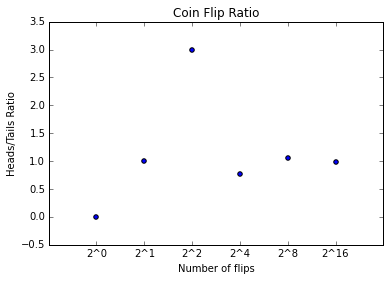

In [57]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
plt.scatter(range(6), ratio)
plt.xticks(range(6), x1)
plt.ylabel("Heads/Tails Ratio")
plt.xlabel("Number of flips")
plt.title("Coin Flip Ratio")

Same as above, just represented as scatterplot. Early on, lots of fluctuation in ratio of heads to tails. With a much larger number of flips, the ratio approaches 1.

# MEAN and STANDARD DEVIATION

In [58]:
def flip_trials(num_trials):
    return [flipper_count(2**16) for trial in range(num_trials)]

In [59]:
trials = flip_trials(20)

In [60]:
print(trials)

[(32741, 32795), (32874, 32662), (33072, 32464), (32493, 33043), (32569, 32967), (32884, 32652), (33006, 32530), (32516, 33020), (32863, 32673), (32970, 32566), (32978, 32558), (32784, 32752), (32766, 32770), (32861, 32675), (32834, 32702), (32831, 32705), (32755, 32781), (32888, 32648), (32959, 32577), (32741, 32795)]


In [62]:
trial_diffs = heads_tails_diff(trials)
trial_ratios = heads_tails_ratio(trials)

In [63]:
print(trial_diffs)
print(trial_ratios)

[-54, 212, 608, -550, -398, 232, 476, -504, 190, 404, 420, 32, -4, 186, 132, 126, -26, 240, 382, -54]
[0.9983534075316359, 1.0064907231645337, 1.0187284376540167, 0.983355022243743, 0.9879273212606546, 1.0071052309200048, 1.0146326467875808, 0.9847365233192005, 1.0058151990940531, 1.0124055763679911, 1.0129000552859513, 1.0009770395701025, 0.9998779371376258, 1.0056924254016832, 1.0040364503700079, 1.0038526219232533, 0.9992068576309447, 1.007351139426611, 1.0117260644012647, 0.9983534075316359]


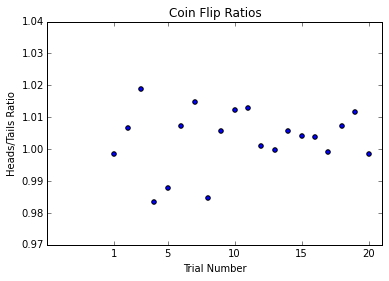

In [80]:
x1 = ["1", "5", "10", "15", "20"]
plt.scatter(range(20), trial_ratios)
plt.xticks([0, 4, 9, 14, 19], x1)
plt.ylabel("Heads/Tails Ratio")
plt.xlabel("Trial Number")
plt.title("Coin Flip Ratios")

In [6]:
def get_mean(nums):
    return st.mean(nums)

def standard_dev(nums):
    return st.stdev(nums)

In [86]:
mean_trials = get_mean(trial_ratios)
stdev_trials = standard_dev(trial_ratios)

In [87]:
print(mean_trials)
print(stdev_trials)

1.0031762043511248
0.00953586635362274


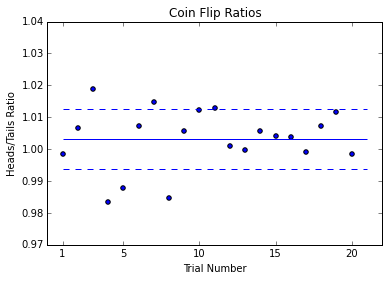

In [92]:
x1 = ["1", "5", "10", "15", "20"]

plt.scatter(range(20), trial_ratios)
plt.xticks([0, 4, 9, 14, 19], x1)
plt.ylabel("Heads/Tails Ratio")
plt.xlabel("Trial Number")
plt.title("Coin Flip Ratios")
plt.hlines(mean_trials, xmin=0, xmax=20, color="blue")
plt.hlines([mean_trials + stdev_trials, mean_trials - stdev_trials], xmin=0, xmax=20, linestyles="dashed", color="blue")

It's interesting to see that the earlier trials seem to be further outside the standard deviation, and there are more of them outside the standard deviation. As the number of trials increases towards 20, the ratio is closer to the mean and more are within the standard deviation. It's probably just due to coincidence, but we could run it again to see what happens.

In [93]:
trials2 = flip_trials(20)

In [94]:
trial_diffs2 = heads_tails_diff(trials2)
trial_ratios2 = heads_tails_ratio(trials2)

In [95]:
mean_trials = get_mean(trial_ratios2)
stdev_trials = standard_dev(trial_ratios2)

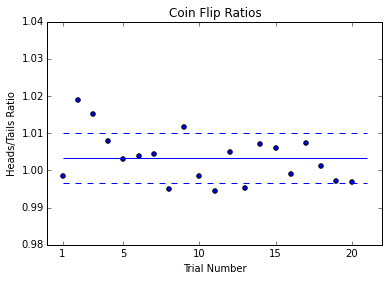

In [97]:
x1 = ["1", "5", "10", "15", "20"]

plt.scatter(range(20), trial_ratios2)
plt.xticks([0, 4, 9, 14, 19], x1)
plt.ylabel("Heads/Tails Ratio")
plt.xlabel("Trial Number")
plt.title("Coin Flip Ratios")
plt.hlines(mean_trials, xmin=0, xmax=20, color="blue")
plt.hlines([mean_trials + stdev_trials, mean_trials - stdev_trials], xmin=0, xmax=20, linestyles="dashed", color="blue")

And I ran it again, and it's the same trend with this one. Less variance as the trials move on. Very interesting. Again, it could be coincidence, and the sample size isn't very large.

In [17]:
hundred_trials = [flipper_count(100) for trial in range(100000)]

In [18]:
hundred_ratios = [trial[0] / 100 for trial in hundred_trials]

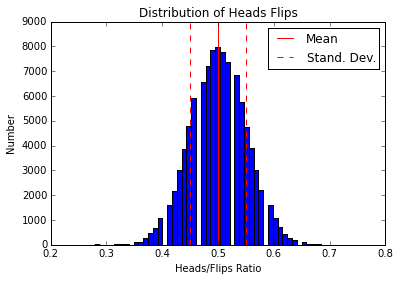

In [48]:
plt.hist(hundred_ratios, bins=50)
plt.xlabel("Heads/Flips Ratio")
plt.ylabel("Number")
plt.title("Distribution of Heads Flips")

ymin, ymax = plt.ylim()
heads_mean = st.mean(hundred_ratios)
heads_stdev = st.stdev(hundred_ratios)
plt.vlines(heads_mean, ymin, ymax=9000, label="Mean", color="red")
plt.vlines([heads_mean - heads_stdev, heads_mean + heads_stdev], ymin, ymax=9000, label="Stand. Dev.", linestyles="dashed", color="red")
plt.legend()
plt.show()

With 100,000 trials of 100 flips for each trial, we see a normal distribution. Because the number of flips for each trial is only 100, the distribution is spread out further than the one below with 1000 flips per trial. (On a side note, I wonder why there are some points that seem to have zero results - is that just the graph not rendering quite correctly, or are those values really 0?)

In [21]:
thousand_trials = [flipper_count(1000) for trial in range(100000)]
thousand_ratios = [trial[0] / 1000 for trial in thousand_trials]

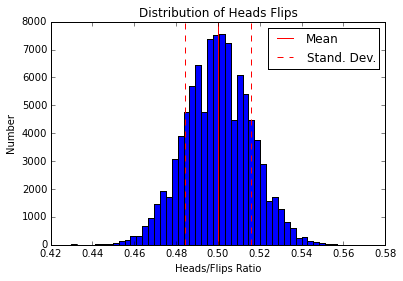

In [49]:
plt.hist(thousand_ratios, bins=50)
plt.xlabel("Heads/Flips Ratio")
plt.ylabel("Number")
plt.title("Distribution of Heads Flips")

ymin, ymax = plt.ylim()
th_heads_mean = st.mean(thousand_ratios)
th_heads_stdev = st.stdev(thousand_ratios)
plt.vlines(th_heads_mean, ymin, ymax, label="Mean", color="red")
plt.vlines([th_heads_mean - th_heads_stdev, th_heads_mean + th_heads_stdev], ymin, ymax, label="Stand. Dev.", linestyles="dashed", color="red")
plt.legend()
plt.show()

Here again we see normal distribution, but with less variance from the mean because the number of flips was 1000 instead of 100. Over the higher number of flips, the ratio of heads to total number of flips varies less (it's closer to 0.50).

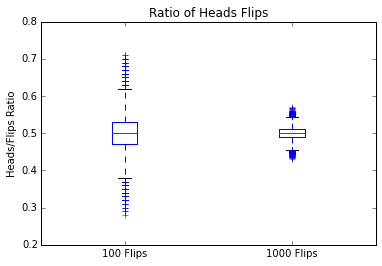

In [34]:
plt.boxplot([hundred_ratios, thousand_ratios])
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax)
plt.title("Ratio of Heads Flips")   
plt.ylabel("Heads/Flips Ratio")
plt.xticks(range(1,3), ["100 Flips", "1000 Flips"])
plt.show()

The boxplot most clearly shows the differences between 100 flips and 1000 flips. With 1000 flips in each trial (for 100,000 trials), the results are more densely packed around 0.50 and less spread out. This makes sense from our ratios earlier - as the number of flips increases, the ratio gets closer to 1 to 1 for heads to tails, or 0.50 for heads to total flips.